# Regional CO2 Emissions vs. Average Temperature 1990-2020
---
### Abstract
#### This dataset was procured from the IPCC (Intergovernmental Panel on Climate Change), the FAO (Food and Agriculture Organization). The aim of this analysis was to gain a depper understanding of this dataset, in particular trying to investigate whether or not there exist relationships between emissions from farming and global temperature changes across time. 

In [1]:
# import dependencies and files
from ipynb.fs.full.emissions_analysis import main_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from pathlib import Path
from scipy.stats import linregress
from scipy.stats import normaltest
from scipy.stats import ttest_ind
import statsmodels.api as sm
continents_data = 'continents.csv'
continents = pd.read_csv(continents_data)


In [2]:
# starting out we're just getting an idea of what the dataset looks like and what values im dealing with
continents_clean = pd.DataFrame({
    'Country': continents['name'],
    'Region': continents['region'],
    'Sub-Region': continents['sub-region']
})
continents_clean

,Country,Region,Sub-Region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [3]:
main_df

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,rice_yield
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,1.9029
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,1.9364
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,1.7143
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,1.7143
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,1.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,0.3428
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,0.3745
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,0.3983
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,0.4484


In [4]:
# merge the two dfs
merge_df = pd.merge(main_df, continents_clean, how='left')
merge_df.head()

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,rice_yield,Region,Sub-Region
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,1.9029,Asia,Southern Asia
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,1.9364,Asia,Southern Asia
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,1.7143,Asia,Southern Asia
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,1.7143,Asia,Southern Asia
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,1.9000,Asia,Southern Asia


# Question to be answered:
### How does emissions from farming relate to changes in temperature over time
---
### Creating our DataFrames

In [5]:
# isolating relevant datapoints for analysis
farm_df = merge_df.loc[:, ['Country', 'Region', 'Sub-Region', 'Year', 'Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use', 'total_emission', 'Average Temperature °C']]
farm_df['Total Farm Emissions'] = farm_df['Crop Residues'] + farm_df['Rice Cultivation'] + farm_df['On-farm Electricity Use'] + farm_df['Agrifood Systems Waste Disposal'] + farm_df['Manure applied to Soils'] + farm_df['Manure left on Pasture'] + farm_df['Manure Management'] + farm_df['On-farm energy use']
farm_df.head()

,Country,Region,Sub-Region,Year,Crop Residues,Rice Cultivation,On-farm Electricity Use,Agrifood Systems Waste Disposal,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,total_emission,Average Temperature °C,Total Farm Emissions
0,Afghanistan,Asia,Southern Asia,1990,205.6077,686.00,14.2666,691.7888,260.1431,1590.5319,319.1763,NaN,2198.963539,0.536167,NaN
1,Afghanistan,Asia,Southern Asia,1991,209.4971,678.16,11.4182,710.8212,268.6292,1657.2364,342.3079,NaN,2323.876629,0.020667,NaN
2,Afghanistan,Asia,Southern Asia,1992,196.5341,686.00,9.2752,743.6751,264.7898,1653.5068,349.1224,NaN,2356.304229,-0.259583,NaN
3,Afghanistan,Asia,Southern Asia,1993,230.8175,686.00,9.0635,791.9246,261.7221,1642.9623,352.2947,NaN,2368.470529,0.101917,NaN
4,Afghanistan,Asia,Southern Asia,1994,242.0494,705.60,8.3962,831.9181,267.6219,1689.3593,367.6784,NaN,2500.768729,0.372250,NaN


In [6]:
# more cleaning and data wrangling
farm_df_2 = farm_df.dropna()
farm_df_2.describe()

,Year,Crop Residues,Rice Cultivation,On-farm Electricity Use,Agrifood Systems Waste Disposal,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,total_emission,Average Temperature °C,Total Farm Emissions
count,4241.000000,4241.000000,4241.000000,4241.000000,4241.000000,4241.000000,4241.000000,4241.000000,4241.000000,4.241000e+03,4241.000000,4241.000000
mean,2005.319029,815.125248,4429.492811,1671.492454,6906.728614,828.729030,3732.714080,1987.668054,2526.408979,6.910943e+04,0.895329,22898.359271
std,8.856207,2985.658130,18507.844794,10327.957795,22610.994625,2723.318833,10147.017161,6502.073256,9784.529154,2.260692e+05,0.569525,76158.818399
min,1990.000000,0.000400,0.000000,0.000000,1.970400,0.303000,1.659700,0.535700,0.031900,-2.524824e+05,-1.302417,36.351200
25%,1998.000000,9.385300,71.117600,7.691900,258.679900,24.196200,99.878400,49.862000,28.126600,4.805191e+03,0.520333,1411.992197
50%,2005.000000,76.610900,246.407276,51.295500,1294.240400,136.112400,728.095900,312.053400,264.054400,1.419740e+04,0.862667,4443.203999
75%,2013.000000,356.216100,926.342278,395.673900,3938.401300,515.822700,2446.562400,1311.047700,1300.997100,4.605262e+04,1.234167,12690.692678
max,2020.000000,33490.074100,164915.255600,165676.299000,213289.701600,29865.388500,92630.756800,70592.646500,139388.923600,3.115114e+06,3.496250,759490.146700


In [7]:
# creating our isolated variable data frame
clean_farm_df = farm_df_2.loc[:, ['Country', 'Region', 'Sub-Region', 'Year', 'Average Temperature °C','Total Farm Emissions']]
clean_farm_df = clean_farm_df.set_index('Country')

# rename the temperature columns
clean_farm_df = clean_farm_df.rename(columns={"Average Temperature °C": 'Average Temperature'})
clean_farm_df.head()

,Region,Sub-Region,Year,Average Temperature,Total Farm Emissions
Country,,,,,
Albania,Europe,Southern Europe,1990,0.735750,1947.9473
Albania,Europe,Southern Europe,1991,-0.461500,1752.6687
Albania,Europe,Southern Europe,1992,0.318250,1684.9544
Albania,Europe,Southern Europe,1993,0.270500,1734.1111
Albania,Europe,Southern Europe,1994,1.202667,2016.5223


In [8]:
# lets test for normality across our sample:
print(normaltest(clean_farm_df['Average Temperature']))
print(normaltest(clean_farm_df['Total Farm Emissions']))
# data isnt normally distributed, so lets change into logarithmic form when we create our subsections to account for this

NormaltestResult(statistic=157.87702541499792, pvalue=5.217224457136098e-35)
NormaltestResult(statistic=5305.823708856806, pvalue=0.0)


In [9]:
# Africa average farming emissions 1990-2020
africa = clean_farm_df.loc[clean_farm_df['Region'] == 'Africa', ['Year', 'Total Farm Emissions', 'Average Temperature']]
africa_emissions = africa.groupby('Year')['Total Farm Emissions'].mean()
africa_emissions_log = np.log(africa_emissions)
africa_temp_mean = africa.groupby('Year')['Average Temperature'].mean()
africa_temp_log = np.log(africa_temp_mean)

# Europe average farming emissions 1990-2020
europe = clean_farm_df.loc[clean_farm_df['Region'] == 'Europe', ['Year', 'Total Farm Emissions', 'Average Temperature']]
europe_emissions = europe.groupby('Year')['Total Farm Emissions'].mean()
europe_emissions_log = np.log(europe_emissions)
europe_temp_mean = europe.groupby('Year')['Average Temperature'].mean()
europe_temp_log = np.log(europe_temp_mean)

# Americas average farming emissions 1990-2020
americas = clean_farm_df.loc[clean_farm_df['Region'] == 'Americas', ['Year', 'Total Farm Emissions', 'Average Temperature']]
americas_emissions = americas.groupby('Year')['Total Farm Emissions'].mean()
americas_emissions_log = np.log(americas_emissions)
americas_temp_mean = americas.groupby('Year')['Average Temperature'].mean()
americas_temp_log = np.log(americas_temp_mean)

# Asia average farming emissions 1990-2020
asia = clean_farm_df.loc[clean_farm_df['Region'] == 'Asia', ['Year', 'Total Farm Emissions', 'Average Temperature']]
asia_emissions = asia.groupby('Year')['Total Farm Emissions'].mean()
asia_emissions_log = np.log(asia_emissions)
asia_temp_mean = asia.groupby('Year')['Average Temperature'].mean()
asia_temp_log = np.log(asia_temp_mean)

# Oceania average farming emissions 1990-2020
oceania = clean_farm_df.loc[clean_farm_df['Region'] == 'Oceania', ['Year', 'Total Farm Emissions', 'Average Temperature']]
oceania_emissions = oceania.groupby('Year')['Total Farm Emissions'].mean()
oceania_emissions_log = np.log(oceania_emissions)
oceania_temp_mean = oceania.groupby('Year')['Average Temperature'].mean()
oceania_temp_log = np.log(oceania_temp_mean)



/Users/tincho/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tincho/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Plotting the Emissions and Temperature over Time

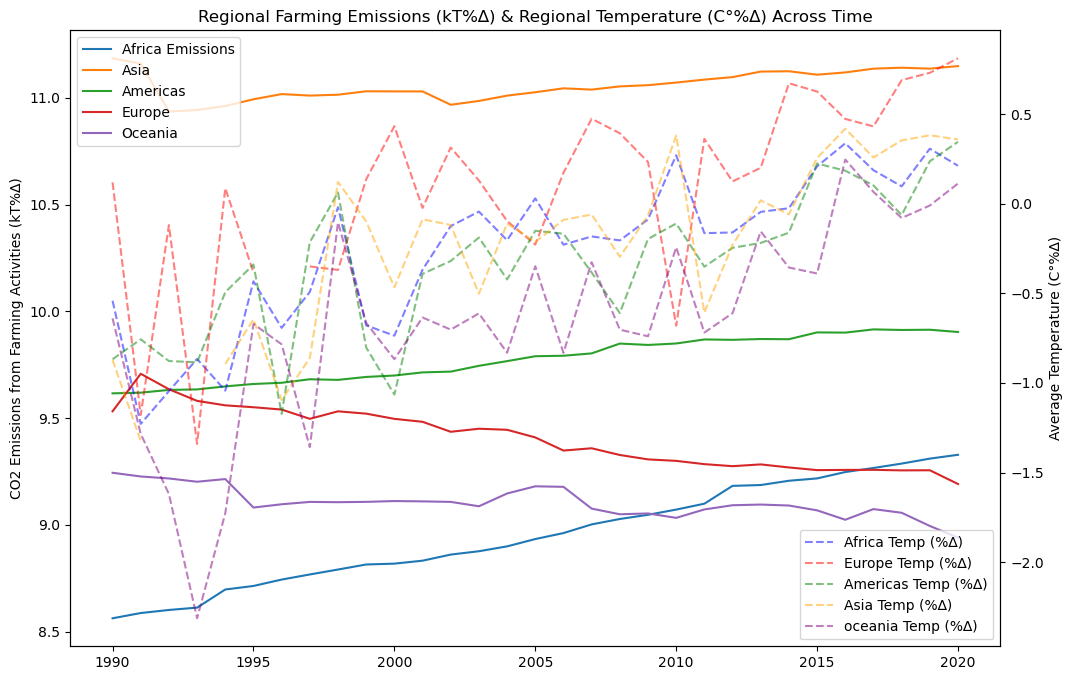

In [10]:
# create plot and format said plot to observe (Farming Emissions vs Year) and (Average Temp vs Year) by region
fig1, ax1 = plt.subplots(figsize= (12,8))
ax2 = ax1.twinx()
ax1.plot(africa_emissions_log, label='Africa Emissions'), ax1.plot(asia_emissions_log, label='Asia'), ax1.plot(americas_emissions_log, label='Americas'), ax1.plot(europe_emissions_log, label='Europe'), ax1.plot(oceania_emissions_log, label='Oceania')
ax2.plot(africa_temp_log, label='Africa Temp (%∆)',color='b',alpha=.5, linestyle='dashed')
ax2.plot(europe_temp_log, label='Europe Temp (%∆)',color='r', alpha=.5, linestyle='dashed')
ax2.plot(americas_temp_log, label='Americas Temp (%∆)',color='g', alpha=.5, linestyle='dashed')
ax2.plot(asia_temp_log, label='Asia Temp (%∆)',color='orange', alpha=.5, linestyle='dashed')
ax2.plot(oceania_temp_log, label='oceania Temp (%∆)',color='purple', alpha=.5, linestyle='dashed')
ax1.set_ylabel('CO2 Emissions from Farming Activities (kT%∆)')
ax2.set_ylabel('Average Temperature (C°%∆)')
plt.title('Regional Farming Emissions (kT%∆) & Regional Temperature (C°%∆) Across Time')
ax1.legend(loc=2)
ax2.legend(loc=4)
plt.show()

### Let's plot regression and test the correlation for farm emissions vs average change in temperature for the 5 regions and look for correlations

In [11]:
# create a function for linear regression:
def line_reg(x,y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_values = slope * x_values + intercept
    regline = 'Y = ' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
    plt.plot(x_values, reg_values, color='r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
    plt.legend()
    print(regline)
    print(f"The r value is {rvalue}")


In [12]:
# create a function for the T test
def ttest(x,y):
    x_values = x
    y_values = y
    (statistic, pvalue) = ttest_ind(x_values,y_values)
    if pvalue < 0.05:
        print(f"P-Value {pvalue} < 0.05 therefore we reject the Ho, the regression value is statistically significant")
    else:
        print(f"P-value {round(pvalue, 2)} >= 0.05 therefore we fail to reject the Ho, Regression is NOT statistically significant")

Y = 0.0x + -2.539
The r value is 0.5250921713807832
P-Value 2.91662245404971e-63 < 0.05 therefore we reject the Ho, the regression value is statistically significant


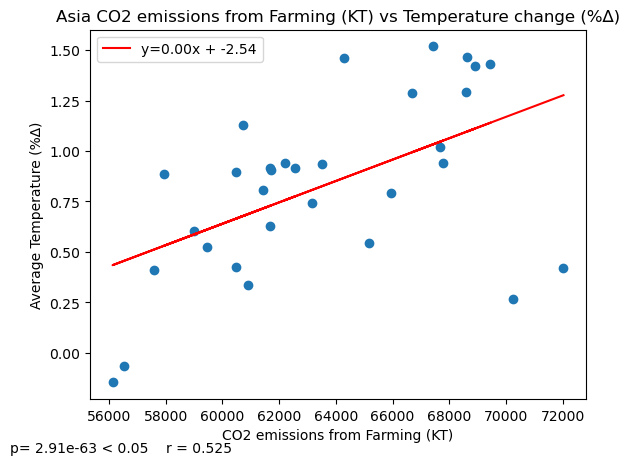

In [34]:
# Plot Asia
plt.scatter(asia_emissions,asia_temp_mean)
line_reg(asia_emissions,asia_temp_mean)
ttest(asia_emissions,asia_temp_mean)
plt.title('Asia CO2 emissions from Farming (KT) vs Temperature change (%∆)')
plt.xlabel('CO2 emissions from Farming (KT)')
plt.ylabel('Average Temperature (%∆)')
plt.figtext(x=0, y=0, s=f"p= 2.91e-63 < 0.05    r = 0.525")
plt.savefig('Pictures/Martin_Fig2.png')
plt.show()

Y = 0.0x + -0.29
The r value is 0.8528370166889548
P-Value 4.4982676799742574e-32 < 0.05 therefore we reject the Ho, the regression value is statistically significant


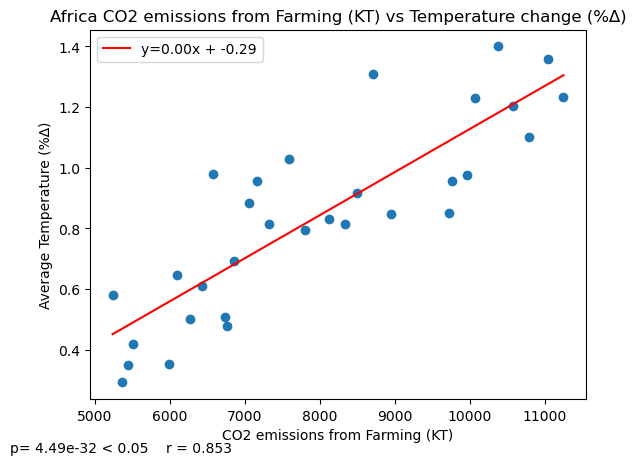

In [35]:
# plot Africa
plt.scatter(africa_emissions, africa_temp_mean)
line_reg(africa_emissions,africa_temp_mean)
ttest(africa_emissions, africa_temp_mean)
plt.title('Africa CO2 emissions from Farming (KT) vs Temperature change (%∆)')
plt.xlabel('CO2 emissions from Farming (KT)')
plt.ylabel('Average Temperature (%∆)')
plt.figtext(x=0, y=0, s=f"p= 4.49e-32 < 0.05    r = 0.853")
plt.savefig('Pictures/Martin_Fig3.png')
plt.show()

Y = 0.0x + -1.252
The r value is 0.7377844531684592
P-Value 2.1328044790575366e-52 < 0.05 therefore we reject the Ho, the regression value is statistically significant


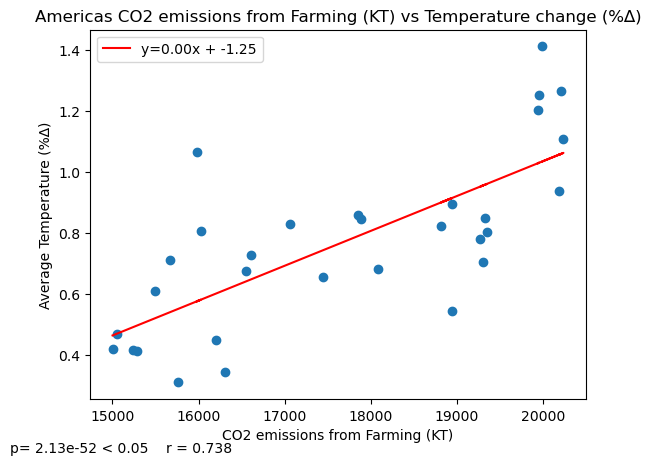

In [36]:
# plot Americas
plt.scatter(americas_emissions, americas_temp_mean)
line_reg(americas_emissions,americas_temp_mean)
ttest(americas_emissions,americas_temp_mean)
plt.title('Americas CO2 emissions from Farming (KT) vs Temperature change (%∆)')
plt.xlabel('CO2 emissions from Farming (KT)')
plt.ylabel('Average Temperature (%∆)')
plt.figtext(x=0, y=0, s=f"p= 2.13e-52 < 0.05    r = 0.738")
plt.savefig('Pictures/Martin_Fig4.png')
plt.show()

Y = -0.0x + 4.064
The r value is -0.7243944230348902
P-Value 7.337627389823651e-45 < 0.05 therefore we reject the Ho, the regression value is statistically significant


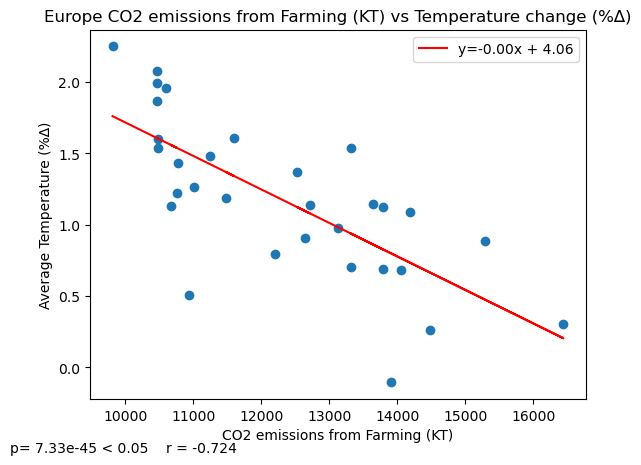

In [37]:
# plot Europe
plt.scatter(europe_emissions, europe_temp_mean)
line_reg(europe_emissions,europe_temp_mean)
ttest(europe_emissions,europe_temp_mean)
plt.title('Europe CO2 emissions from Farming (KT) vs Temperature change (%∆)')
plt.xlabel('CO2 emissions from Farming (KT)')
plt.ylabel('Average Temperature (%∆)')
plt.figtext(x=0, y=0, s=f"p= 7.33e-45 < 0.05    r = -0.724")
plt.savefig('Pictures/Martin_Fig5')
plt.show()

Y = -0.0x + 3.423
The r value is -0.6950723738725805
P-Value 1.8844429065803235e-62 < 0.05 therefore we reject the Ho, the regression value is statistically significant


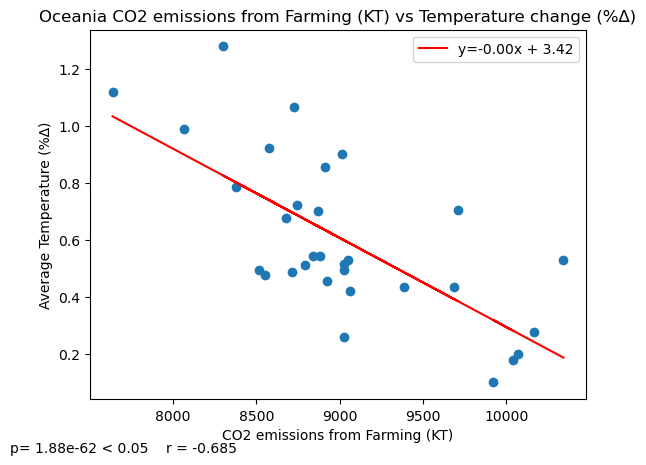

In [38]:
# plot Oceania
plt.scatter(oceania_emissions, oceania_temp_mean)
line_reg(oceania_emissions,oceania_temp_mean)
ttest(oceania_emissions,oceania_temp_mean)
plt.title('Oceania CO2 emissions from Farming (KT) vs Temperature change (%∆)')
plt.xlabel('CO2 emissions from Farming (KT)')
plt.ylabel('Average Temperature (%∆)')
plt.figtext(x=0, y=0, s=f"p= 1.88e-62 < 0.05    r = -0.685")
plt.savefig('Pictures/Martin_Fig6')
plt.show()

## Analysis:

### There is a statistically significant relationship between farming emissions and CO2 levels across all 5 regions

#### We can observe from Figure 1 that there is a weak but noticeable trend across time between temperature icnreases and increases in CO2 emissions from farming practices. As observed, across our timeframe Asia was the main culprit in CO2 emissions from farming, with the regions of Oceania and Europe being the only two that decreased their emissions of CO2 from farming activities in that time period.
#### As we look a little deeper, we can observe that there exist, strong linear relationships across all 5 regions between the emission of CO2 from farming activities and temperature increases. Interestingly however, In Europe and Oceania, the relationship is inverse, showing that as their emissions decreased the average temperature increased. This could be attributed to the fact that their cut-down in emissions isnt enough to make up for the consistent waming across the entire globe, or also the fact that temperature increases are seen as a result of past emissions, not so much a direct effect of the previous year's emissions. Further testing and analisys would need to be done in this category, as there is more we can learn about the effects on global temperatures from emissions. More data would be required.
---

## Multiple Regression Analysis
#### In order to get a closer inspection of the data, we perfomr a simple multiple regression model on the overall sample to understand if different factors of farming emissions have more or less impact on temperature change

In [18]:
# lets model this with a multiple regression model to see how much each emitter within our farming statistic affected total global temperature change
farm_df_2

,Country,Region,Sub-Region,Year,Crop Residues,Rice Cultivation,On-farm Electricity Use,Agrifood Systems Waste Disposal,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use,total_emission,Average Temperature °C,Total Farm Emissions
31,Albania,Europe,Southern Europe,1990,59.2391,23.5200,45.2103,444.4512,196.6440,383.3071,474.6951,320.8805,3475.291240,0.735750,1947.9473
32,Albania,Europe,Southern Europe,1991,31.4625,6.2720,18.4951,443.8552,194.1851,394.0694,469.1415,195.1879,5680.135772,-0.461500,1752.6687
33,Albania,Europe,Southern Europe,1992,29.9373,1.8816,4.2558,445.0997,187.3747,400.0541,453.2180,163.1332,5221.131572,0.318250,1684.9544
34,Albania,Europe,Southern Europe,1993,44.0550,1.0976,8.6999,446.7996,198.8094,426.4171,481.3836,126.8489,5316.973272,0.270500,1734.1111
35,Albania,Europe,Southern Europe,1994,42.4253,0.0000,3.0976,449.4347,260.3013,546.0098,620.2991,94.9545,5564.287672,1.202667,2016.5223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,Africa,Sub-Saharan Africa,2016,70.9451,7.4088,428.4352,1077.2392,96.1332,2721.1459,282.5994,417.3150,98491.026347,1.120250,5101.2218
6961,Zimbabwe,Africa,Sub-Saharan Africa,2017,108.6262,7.9458,304.7852,1093.3441,81.2314,2744.8763,255.5900,398.1644,97159.311553,0.046500,4994.5634
6962,Zimbabwe,Africa,Sub-Saharan Africa,2018,109.9835,8.1399,346.8512,1108.5523,81.0712,2790.0949,257.2735,465.7735,97668.308205,0.516333,5167.7400
6963,Zimbabwe,Africa,Sub-Saharan Africa,2019,45.4574,7.8322,350.2168,1121.3255,85.7211,2828.7215,267.5224,444.2335,98988.062799,0.985667,5151.0304


In [19]:
# create new dataframe with only the variables to be used, these will become our independent and explanatory variables
ols_df = farm_df_2.loc[:,['Year', 'Average Temperature °C', 'Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use']]
ols_df = ols_df.rename(columns={"Average Temperature °C": 'Average Temperature'})

# group by averages per year
grp_ols_df_y = ols_df.groupby('Year')['Average Temperature'].mean()
grp_ols_df_x = ols_df.groupby('Year')['Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use'].mean()

# in order to better look at this data i decided to make this a Log-Log function so we can interpret the results in % change
grp_ols_df_x_log = np.log(grp_ols_df_x)
grp_ols_df_x_log

# merge the two groups to create one dataset for our regression
merged_ols = pd.merge(grp_ols_df_y, grp_ols_df_x_log, how= 'outer', on='Year')
merged_ols

/var/folders/58/wf3rb_4174q5hgcffz8xp_640000gn/T/ipykernel_8324/577108387.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_ols_df_x = ols_df.groupby('Year')['Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use'].mean()


,Average Temperature,Crop Residues,Rice Cultivation,On-farm Electricity Use,Agrifood Systems Waste Disposal,Manure applied to Soils,Manure left on Pasture,Manure Management,On-farm energy use
Year,,,,,,,,,
1990,0.601180,6.587817,8.512410,6.967315,8.797351,6.624735,8.156664,7.542011,7.790349
1991,0.334712,6.589236,8.488448,7.084152,8.821205,6.677274,8.157605,7.594668,7.822958
1992,0.362076,6.539278,8.384465,7.252990,8.741559,6.694057,8.083847,7.584199,7.825219
1993,0.260275,6.551650,8.370435,7.250175,8.748472,6.685467,8.076689,7.576857,7.801632
1994,0.572916,6.525457,8.362542,7.288520,8.753379,6.686268,8.112310,7.577054,7.792018
1995,0.634788,6.539302,8.375820,7.317611,8.765138,6.688032,8.115258,7.579733,7.824172
1996,0.289646,6.586821,8.388859,7.340722,8.782454,6.690844,8.126981,7.590384,7.848810
1997,0.613229,6.599493,8.392180,7.336387,8.780187,6.663243,8.119549,7.548563,7.854836
1998,0.963741,6.604585,8.381732,7.336323,8.813112,6.655647,8.125582,7.558796,7.846436


In [20]:
# fitting the model
x = merged_ols[['Crop Residues', 'Rice Cultivation', 'On-farm Electricity Use', 'Agrifood Systems Waste Disposal', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use']]
y = merged_ols['Average Temperature']
x = sm.add_constant(x)
est = sm.OLS(y,x).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average Temperature   R-squared:                       0.900
Model:                             OLS   Adj. R-squared:                  0.864
Method:                  Least Squares   F-statistic:                     24.81
Date:                 Tue, 01 Aug 2023   Prob (F-statistic):           2.67e-09
Time:                         20:22:39   Log-Likelihood:                 25.363
No. Observations:                   31   AIC:                            -32.73
Df Residuals:                       22   BIC:                            -19.82
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              22.8737     19.779      1.156      0.260     -18.146      63.894
Crop Residues                       0.6444      1.441      0.447      0.659      -2.345       3.634
Rice Cultivation                   -2.8155      1.193     -2.361      0.028      -5.289      -0.342
On-farm Electricity Use             0.4379      0.521      0.840      0.410      -0.643       1.519
Agrifood Systems Waste Disposal     0.3230      1.304      0.248      0.807      -2.382       3.028
Manure applied to Soils            -5.5253      3.684     -1.500      0.148     -13.165       2.114
Manure left on Pasture              4.2239      1.367      3.089      0.005       1.388       7.060
Manure Management                   0.2464      3.994      0.062      0.951      -8.036       8.529
On-farm energy use                 -1.0495      0.649     -1.618      0.120      -2.395       0.296
==============================================================================
Omnibus:                        8.043   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.403
Skew:                          -0.936   Prob(JB):                       0.0407
Kurtosis:                       4.204   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting the Regression results

#### There is little to be learned from the above regression, despite the adjusted r^2 being relatively high i cant say i believe this is a good model to describe this data. Most of our independent variables have P values far too high to have any attributable significance on the independent variable. I suspect this issue arises from a couple of different reasons, such as Multicolinearity within the dataset, Heteroskedastic error, correlation between the explanatory variables and the error term, among others. In short, this model in it's current form does not clear the classical assumptions for regression analysis.